<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) Project 4 is all about exploring this data and modeling interesting relationships with regression.

Project 4 is also much more open-ended than the previous projects. You are more responsible for finding things about the data that interest you, coming up with your own hypothesis about it, and reporting on the analysis you carry out. That being said, there are still specific requirements and restrictions on the type of models you will be constructing.

---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

**There is a lot of different data. You are _NOT_ expected to explore all of it or include all of it in analyses.** The point of the project is to focus on aspects of San Francisco that are particularly interesting to you from a modeling point of view. 

**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Choose a dataset or datasets of interest to you and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ipywidgets import *
from IPython.display import display

%matplotlib inline

In [43]:
sf_data = pd.read_csv(
        #'san_francisco_data/zillow_property_sales/zillow_mediansale_persqft_neighborhood.csv')
        'san_francisco_data/assessor_office/assessor_data_2014_2015.csv')

In [44]:
sf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206816 entries, 0 to 206815
Data columns (total 41 columns):
PROPLOC       206816 non-null object
RP1NBRCDE     206731 non-null object
RP1PRCLID     206816 non-null object
BASELOT       206816 non-null int64
BASELOTSFX    45 non-null object
RP1VOLUME     206816 non-null int64
RP1CLACDE     206465 non-null object
YRBLT         206816 non-null int64
BATHS         206816 non-null int64
BEDS          206816 non-null int64
ROOMS         206816 non-null int64
STOREYNO      206816 non-null int64
UNITS         206816 non-null int64
CHGDATE       206816 non-null int64
REMARKFLA     2111 non-null object
KITCHEN       28035 non-null object
BUILTIN       206816 non-null int64
ZONE          174762 non-null object
CONSTTYPE     169753 non-null object
DEPTH         206816 non-null float64
FRONT         206816 non-null float64
SQFT          206816 non-null int64
FBA           206816 non-null int64
LAREA         206816 non-null float64
LOTCODE       715

In [45]:
sf_data.tail()

,PROPLOC,RP1NBRCDE,RP1PRCLID,BASELOT,BASELOTSFX,RP1VOLUME,RP1CLACDE,YRBLT,BATHS,BEDS,...,EXEMPTYPE,RP1STACDE,RP1EXMVL2,RP1EXMVL1,ROLLYEAR,RECURRSALD,RP1FXTVAL,RP1IMPVAL,RP1LNDVAL,RP1PPTVAL
206811,0000 0000 0000,NaN,9999 192,0,NaN,45,NaN,0,0,0,...,NaN,S,0,0,14,140101,0,0,0,713362
206812,0000 0000 0000,NaN,9999 193,0,NaN,45,NaN,0,0,0,...,NaN,S,0,0,14,140101,0,3074178,0,0
206813,0000 0000 0000,NaN,9999 194,0,NaN,45,NaN,0,0,0,...,NaN,S,0,0,14,140101,0,0,0,6855
206814,0000 0000 0000,NaN,9999 195,0,NaN,45,NaN,0,0,0,...,NaN,S,0,0,14,140101,0,0,0,37393
206815,0000 0000 0000,NaN,9999 196,0,NaN,45,NaN,0,0,0,...,NaN,S,0,0,14,140101,0,0,0,17007


In [46]:
sf_data.columns

Index([u'PROPLOC', u'RP1NBRCDE', u'RP1PRCLID', u'BASELOT', u'BASELOTSFX',
       u'RP1VOLUME', u'RP1CLACDE', u'YRBLT', u'BATHS', u'BEDS', u'ROOMS',
       u'STOREYNO', u'UNITS', u'CHGDATE', u'REMARKFLA', u'KITCHEN', u'BUILTIN',
       u'ZONE', u'CONSTTYPE', u'DEPTH', u'FRONT', u'SQFT', u'FBA', u'LAREA',
       u'LOTCODE', u'REPRISDATE', u'RP1RECDAT1', u'RP1DOCNO1', u'RP1DOCNO2',
       u'RP1TRACDE', u'OWNRPRCNT', u'EXEMPTYPE', u'RP1STACDE', u'RP1EXMVL2',
       u'RP1EXMVL1', u'ROLLYEAR', u'RECURRSALD', u'RP1FXTVAL', u'RP1IMPVAL',
       u'RP1LNDVAL', u'RP1PPTVAL'],
      dtype='object')

In [47]:
sf_data_num = sf_data[['BATHS', 'BEDS', 'ROOMS', 'SQFT', 'RP1IMPVAL', 'RP1PPTVAL']]

In [48]:
sf_data_corr = sf_data_num.corr()

In [29]:
# I will look at whether there is any correlation  between the columns present 
# in sf_data_num and RP1PPTVAL

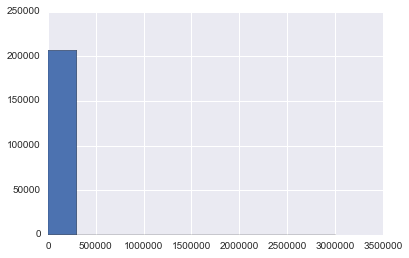

In [49]:
sf_data_num['SQFT'].hist()

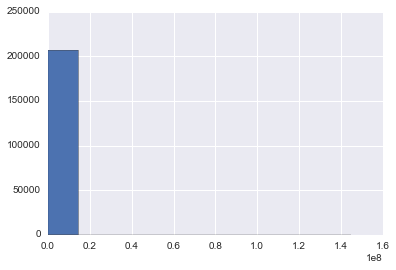

In [50]:
sf_data_num['RP1PPTVAL'].hist()

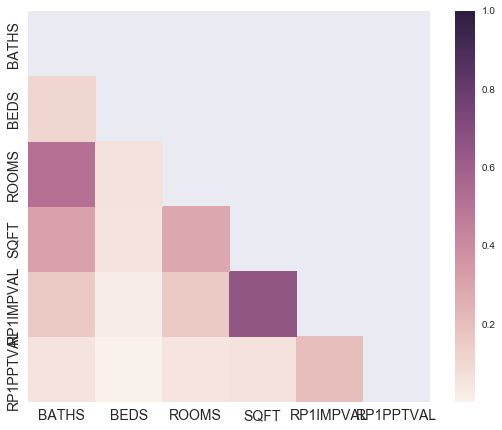

In [51]:
plt.rcParams['figure.figsize']=(9,7)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(sf_data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(sf_data_corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


In [52]:
target = 'RP1PPTVAL'

In [53]:
import patsy

# Get the non-target cols with a simple list comprehension
non_target_cols = [x for x in sf_data_num.columns if x != target]

# Use some string adding and joining to make the simple model formula:
# put in -1 to remove the intercept (which sklearn will add later on)
formula_simple = target + ' ~ ' + ' + '.join(non_target_cols) + ' -1'
print formula_simple

# Create the X and Y pairs for our data
Y, X = patsy.dmatrices(formula_simple, data=sf_data_num)

RP1PPTVAL ~ BATHS + BEDS + ROOMS + SQFT + RP1IMPVAL -1


In [54]:
from sklearn.linear_model import Ridge

In [55]:
def ridge_coefs(X, Y, alphas):
    
    # set up the list to hold the different sets of coefficients:
    coefs = []
    
    # Set up a ridge regression object
    ridge_reg = Ridge()
    
    # Iterate through the alphas fed into the function:
    for a in alphas:
        
        # On each alpha reset the ridge model's alpha to the current one:
        ridge_reg.set_params(alpha=a)
        
        # fit or refit the model on the provided X, Y
        ridge_reg.fit(X, Y)
        
        # Get out the coefficient list (first element of the .coef_ attribute)
        coefs.append(ridge_reg.coef_[0])
        
    return coefs

In [56]:
r_alphas = np.logspace(0, 5, 200)

# Get the coefficients for each alpha for the Ridge, using the function above
r_coefs = ridge_coefs(X, Y, r_alphas)

In [57]:
# I'll use the plotting function we used  in class

from cycler import cycler

def coef_plotter(alphas, coefs, feature_names, to_alpha, regtype='ridge'):
    
    # Get the full range of alphas before subsetting to keep the plots from 
    # resetting axes each time. (We use these values to set static axes later).
    amin = np.min(alphas)
    amax = np.max(alphas)
    
    # Subset the alphas and coefficients to just the ones below the set limit
    # from the interactive widget:
    alphas = [a for a in alphas if a <= to_alpha]
    coefs = coefs[0:len(alphas)]
    
    # Get some colors from seaborn:
    colors = sns.color_palette("husl", len(coefs[0]))
    
    # Get the figure and reset the size to be wider:
    fig = plt.figure()
    fig.set_size_inches(18,7)

    # We have two axes this time on our figure. 
    # The fig.add_subplot adds axes to our figure. The number inside stands for:
    #[figure_rows|figure_cols|position_of_current_axes]
    ax1 = fig.add_subplot(121)
    
    # Give it the color cycler:
    ax1.set_prop_cycle(cycler('color', colors))
    
    # Print a vertical line showing our current alpha threshold:
    ax1.axvline(to_alpha, lw=2, ls='dashed', c='k', alpha=0.4)
    
    # Plot the lines of the alphas on x-axis and coefficients on y-axis
    ax1.plot(alphas, coefs, lw=2)
    
    # set labels for axes:
    ax1.set_xlabel('alpha', fontsize=20)
    ax1.set_ylabel('coefficients', fontsize=20)
    
    # If this is for the ridge, set this to a log scale on the x-axis:
    if regtype == 'ridge':
        ax1.set_xscale('log')
    
    # Enforce the axis limits:
    ax1.set_xlim([amin, amax])
    
    # Put a title on the axis
    ax1.set_title(regtype+' coef paths\n', fontsize=20)
    
    # Get the ymin and ymax for this axis to enforce it to be the same on the 
    # second chart:
    ymin, ymax = ax1.get_ylim()

    # Add our second axes for the barplot in position 2:
    ax2 = fig.add_subplot(122)
    
    # Position the bars according to their index from the feature names variable:
    ax2.bar(range(1, len(feature_names)+1), coefs[-1], align='center', color=colors)
    ax2.set_xticks(range(1, len(feature_names)+1))
    
    # Reset the ticks from numbers to acutally be the names:
    ax2.set_xticklabels(feature_names, rotation=65, fontsize=12)
    
    # enforce limits and add titles, labels
    ax2.set_ylim([ymin, ymax])
    ax2.set_title(regtype+' predictor coefs\n', fontsize=20)
    ax2.set_xlabel('coefficients', fontsize=20)
    ax2.set_ylabel('alpha', fontsize=20)
    
    plt.show()

In [61]:
simple_feature_names = X.design_info.column_names

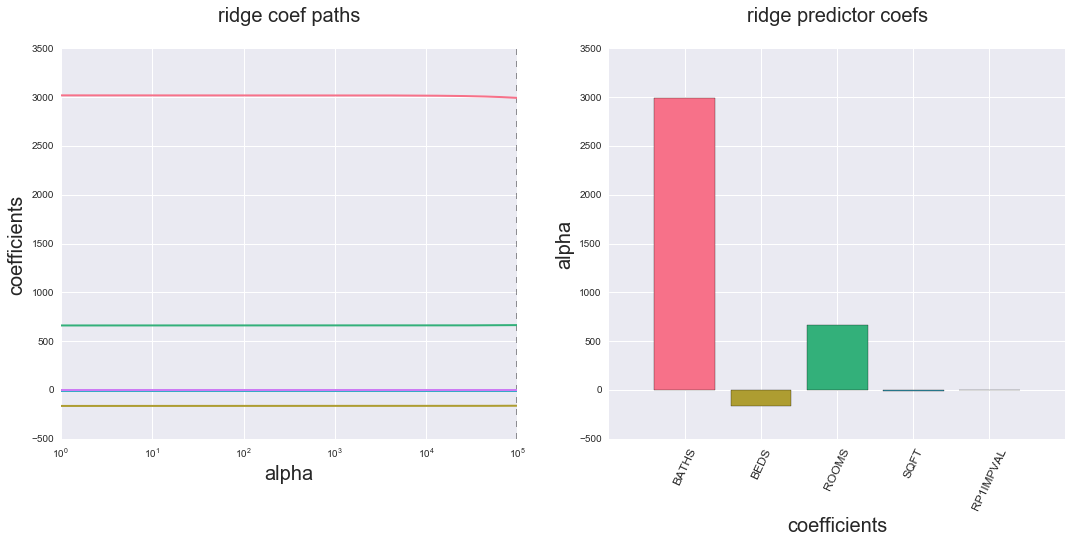

<function __main__.ridge_plot_runner>

In [62]:
def ridge_plot_runner(log_of_alpha=7):
    coef_plotter(r_alphas, r_coefs, simple_feature_names, 10**log_of_alpha, regtype='ridge')

interact(ridge_plot_runner, log_of_alpha=(0.0,5.0,0.05))

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine multiple sources of data and evaluate a model with regularized regression

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**

1. Use _NEW_ sources of data for this section. It should not be related to your analysis/hypothesis from section 1.
- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. Find the optimal hyperparameters (alpha, l1_ratio) using gridsearch.
- Report on which model is best, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


In [63]:
sf_data1 = pd.read_csv(
    'san_francisco_data/assessor_office/assessor_data_2013_2014.csv')

/Users/Ovid/anaconda2/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [64]:
sf_data1.head(11)

,PROPLOC,RP1NBRCDE,RP1PRCLID,RP1VOLUME,RP1CLACDE,YRBLT,BATHS,BEDS,ROOMS,STOREYNO,...,EXEMPTYPE,RP1STACDE,RP1EXMVL2,RP1EXMVL1,ROLLYEAR,RECURRSALD,RP1FXTVAL,RP1IMPVAL,RP1LNDVAL,RP1PPTVAL
0,0000 0000 0000,08H,0001 001,1,G,1900,0,0,0,0,...,NaN,N,0,0,13,0,0,0,0,0
1,0000 0000 0000,08H,0002 001,1,G,1900,0,0,0,0,...,NaN,N,0,0,13,0,0,0,0,0
2,0000 0000 0000,08H,0004 002,1,V,0,0,0,0,0,...,NaN,N,0,0,13,0,0,0,0,0
3,0000 0000 0000,08H,0005 001,1,G,1900,0,0,0,0,...,NaN,N,0,0,13,0,0,0,0,0
4,0000 0000 0000,08H,0006 001,1,G,1900,0,0,0,0,...,NaN,N,0,0,13,0,0,0,0,0
5,0000 0000 0000,08H,0007 001,1,G,1900,0,0,0,0,...,NaN,N,0,0,13,0,0,0,0,0
6,0000 2801 LEAVENWORTH ST0000,08H,0010 001,1,C1,1907,0,0,0,3,...,NaN,NaN,0,0,13,110523,0,8564572,12846859,0
7,0495 0455 JEFFERSON ST0000,08H,0010 002,1,H,1907,0,0,0,4,...,NaN,NaN,0,0,13,0,0,0,1,0
8,0000 2800 LEAVENWORTH ST0000,08H,0011 007,1,HC,0,0,0,0,0,...,NaN,NaN,0,0,13,41001,3772351,30789127,30789127,100635
9,0000 0500 BEACH ST0000,08H,0011 008,1,C1,1974,7,0,36,4,...,NaN,NaN,0,0,13,41001,0,15734148,30789127,0


In [65]:
sf_data1.columns

Index([u'PROPLOC', u'RP1NBRCDE', u'RP1PRCLID', u'RP1VOLUME', u'RP1CLACDE',
       u'YRBLT', u'BATHS', u'BEDS', u'ROOMS', u'STOREYNO', u'UNITS',
       u'CHGDATE', u'ZONE', u'CONSTTYPE', u'DEPTH', u'FRONT', u'SQFT', u'FBA',
       u'LAREA', u'LOTCODE', u'REPRISDATE', u'RP1RECDAT1', u'RP1DOCNO1',
       u'RP1DOCNO2', u'RP1TRACDE', u'OWNRPRCNT', u'EXEMPTYPE', u'RP1STACDE',
       u'RP1EXMVL2', u'RP1EXMVL1', u'ROLLYEAR', u'RECURRSALD', u'RP1FXTVAL',
       u'RP1IMPVAL', u'RP1LNDVAL', u'RP1PPTVAL'],
      dtype='object')

In [66]:
sf_data1_num = sf_data1[['BATHS', 'BEDS', 'ROOMS', 'SQFT', 'YRBLT', 'RP1PPTVAL','RP1IMPVAL']]

In [67]:
sf_data1_num.corr()

,BATHS,BEDS,ROOMS,SQFT,YRBLT,RP1PPTVAL,RP1IMPVAL
BATHS,1.000000,0.103035,0.513579,0.314752,0.080859,0.066776,0.160099
BEDS,0.103035,1.000000,0.063830,0.051647,0.031605,0.003497,0.024179
ROOMS,0.513579,0.063830,1.000000,0.291875,0.085208,0.065892,0.160848
SQFT,0.314752,0.051647,0.291875,1.000000,0.051284,0.072678,0.658973
YRBLT,0.080859,0.031605,0.085208,0.051284,1.000000,-0.014117,0.014040
RP1PPTVAL,0.066776,0.003497,0.065892,0.072678,-0.014117,1.000000,0.210835
RP1IMPVAL,0.160099,0.024179,0.160848,0.658973,0.014040,0.210835,1.000000


In [68]:
target = 'RP1PPTVAL' 

In [69]:
non_target_cols = [x for x in sf_data1_num.columns if x != target]

# Use some string adding and joining to make the simple model formula:
# put in -1 to remove the intercept (which sklearn will add later on)
formula_simple = target + ' ~ ' + ' + '.join(non_target_cols) + ' -1'
print formula_simple

# Create the X and Y pairs for our data
Y, X = patsy.dmatrices(formula_simple, data=sf_data1_num)

RP1PPTVAL ~ BATHS + BEDS + ROOMS + SQFT + YRBLT + RP1IMPVAL -1


In [70]:
from sklearn.cross_validation import KFold
kfolds = KFold(sf_data1_num.shape[0], n_folds=5)

In [71]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [72]:
l_alphas = np.arange(0, 0.15, 0.0025)
r_alphas = np.logspace(0, 5, 200)
enet_alphas = np.arange(0, 1.0, 0.005)

In [162]:
def ridge_lasso_cv_rsq(X, Y, r_alphas, l_alphas, e_alphas, kfolds, verbose=False):
    
    # lists to track mean R2s per alpha
    ridge_rsq = []
    lasso_rsq = []
    enet_rsq = []

    # initialize models
    lasso = Lasso()
    ridge = Ridge()
    enet = ElasticNet()

    print 'Lasso...'
    # iterate through Lasso alphas
    for la in l_alphas:
        
        if verbose: print la
        
        # set the current alpha to the model
        lasso.set_params(alpha=la)
        
        # keep track of fold R2s
        rsqs = []
        
        # iterate through the folds. Each iteration returns the training and
        # testing indices
        for traini, testi in kfolds:
            
            # run the current model with the subset training X and Y
            lasso.fit(X[traini], Y[traini])
            
            # append the R2 on the test set to the tracker
            rsqs.append(lasso.score(X[testi], Y[testi]))
            
        # append the mean of the R2s for this alpha to the R2 by alpha list
        lasso_rsq.append(np.mean(rsqs))

    print 'Ridge...'
    # Do the same process as above for ridge...
    for ra in r_alphas:
        
        if verbose: print ra
        
        ridge.set_params(alpha=ra)
        rsqs = []
        for traini, testi in kfolds:
            ridge.fit(X[traini], Y[traini])
            rsqs.append(ridge.score(X[testi], Y[testi]))
        ridge_rsq.append(np.mean(rsqs))
        
    print 'ElasticNet...'
    # Do the same process as above for ridge...
    for ea in e_alphas:
        
        if verbose: print ea
        
        enet.set_params(alpha=ea, l1_ratio=0.5)
        rsqs = []
        for traini, testi in kfolds:
            enet.fit(X[traini], Y[traini])
            rsqs.append(enet.score(X[testi], Y[testi]))
        enet_rsq.append(np.mean(rsqs))
        
    from sklearn.linear_model import LinearRegression
    
    linreg_rsq = []
    linreg = LinearRegression()
    for traini, testi in kfolds:
        linreg.fit(X[traini], Y[traini])
        linreg_rsq.append(linreg.score(X[testi], Y[[testi]]))
        
    linreg_rsq = np.mean(linreg_rsq)
        
    return ridge_rsq, lasso_rsq, enet_rsq, linreg_rsq
    
# Get the ridge and lasso cross-validated R2s:

ridge_rsq, lasso_rsq, enet_rsq, linreg_rsq = ridge_lasso_cv_rsq(X, Y, r_alphas, l_alphas, 
                                                                enet_alphas, kfolds)

Lasso...


/Users/Ovid/anaconda2/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:30: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


Ridge...
ElasticNet...


/Users/Ovid/anaconda2/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:60: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


In [163]:
def rsq_plotter(ridge_alphas, ridge_to_alpha, ridge_rsq,
                lasso_alphas, lasso_to_alpha, lasso_rsq,
                enet_alphas, enet_to_alpha, enet_rsq,
                linreg_rsq):
    
    
    # Find the overall minimum and maximum alpha values for
    # the Ridge and Lasso to fix the plot axes:
    ridge_amin = np.min(ridge_alphas)
    ridge_amax = np.max(ridge_alphas)
    
    lasso_amin = np.min(lasso_alphas)
    lasso_amax = np.max(lasso_alphas)
    
    enet_amin = np.min(enet_alphas)
    enet_amax = np.max(enet_alphas)
    
    # Subet the models' alphas and rsqs according to the currently set
    # alpha limits for each (passed in from the interactive sliders)
    ridge_alphas = [a for a in ridge_alphas if a <= ridge_to_alpha]
    ridge_rsq = ridge_rsq[0:len(ridge_alphas)]
    
    lasso_alphas = [a for a in lasso_alphas if a <= lasso_to_alpha]
    lasso_rsq = lasso_rsq[0:len(lasso_alphas)]
    
    enet_alphas = [a for a in enet_alphas if a <= enet_to_alpha]
    enet_rsq = enet_rsq[0:len(enet_alphas)]
    
    # Get some unique colors out for the Ridge R2 line, Lasso R2 line,
    # Enet R2, and the 'max R2 achieved' line.
    colors = sns.xkcd_palette(['windows blue', 'amber', 'dark red', 'faded green'])

    # We will again be plotting two axes on the same figure:
    fig = plt.figure()
    fig.set_size_inches(18,7)

    # The first subplot axes is for the ridge
    ax1 = fig.add_subplot(131)
    
    # Plot a vertical line indicating the current alpha selected
    ax1.axvline(ridge_to_alpha, lw=2, ls='dashed', c='k', alpha=0.4)
    
    # Plot a horizontal line for the vanilla linear regression R^2
    ax1.axhline(linreg_rsq, lw=2, c=colors[2], alpha=0.8)
    
    # Plot the line tracking R2s by alpha values
    ax1.plot(ridge_alphas, ridge_rsq, lw=3, c=colors[0])
    
    # Add the axis labels
    ax1.set_xlabel('ridge alpha', fontsize=20)
    ax1.set_ylabel('ridge CV R2', fontsize=20)
    
    # Set x-axis to logarithmic scale
    ax1.set_xscale('log')
    
    # Fix the axes in place
    ax1.set_xlim([ridge_amin, ridge_amax])
    ax1.set_ylim([-0.05, 1])
    
    # set the title for the axes;
    ax1.set_title('ridge cross-val performance\n', fontsize=20)
    
    
    # Now do all of this as above for the Lasso!
    ax2 = fig.add_subplot(132)
    ax2.axvline(lasso_to_alpha, lw=2, ls='dashed', c='k', alpha=0.4)
    ax2.axhline(linreg_rsq, lw=2, c=colors[2], alpha=0.8)
    
    ax2.plot(lasso_alphas, lasso_rsq, lw=3, c=colors[0])
    
    ax2.set_xlabel('lasso alpha', fontsize=20)
    ax2.set_ylabel('lasso CV R2', fontsize=20)
    ax2.set_xlim([lasso_amin, lasso_amax])
    ax2.set_ylim([-0.05, 1])
        
    ax2.set_title('lasso cross-val performance\n', fontsize=20)
    
    
    # And ElasticNet:
    ax3 = fig.add_subplot(133)
    ax3.axvline(enet_to_alpha, lw=2, ls='dashed', c='k', alpha=0.4)
    ax3.axhline(linreg_rsq, lw=2, c=colors[3], alpha=0.8)
    
    ax3.plot(enet_alphas, enet_rsq, lw=3, c=colors[0])
    
    ax3.set_xlabel('enet alpha', fontsize=20)
    ax3.set_ylabel('enet CV R2', fontsize=20)
    ax3.set_xlim([enet_amin, enet_amax])
    ax3.set_ylim([-0.05, 1])
        
    ax3.set_title('enet cross-val performance\n', fontsize=20)
    
    plt.show()

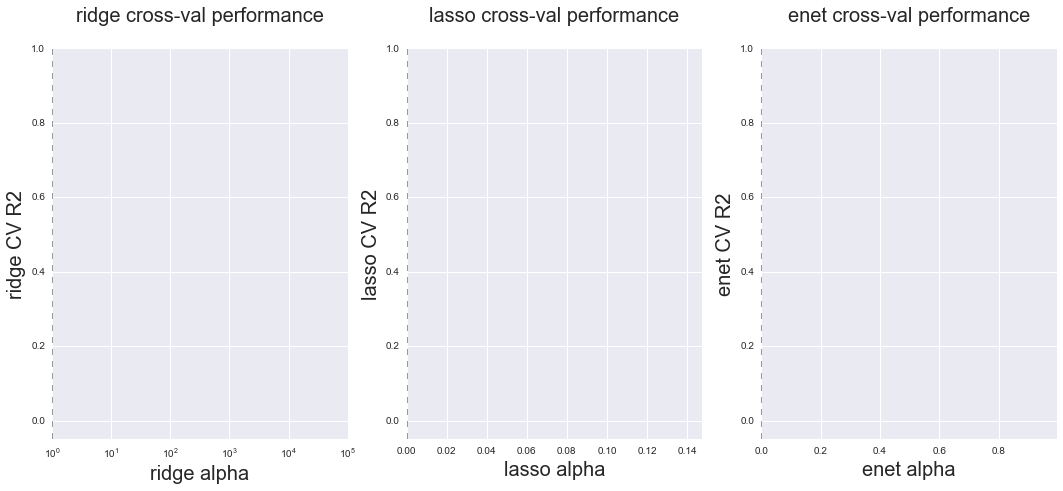

In [164]:
def rsq_plot_pipe(ra, la, ea):
    rsq_plotter(r_alphas, 10**ra, ridge_rsq, l_alphas, la, lasso_rsq, enet_alphas, ea, enet_rsq, linreg_rsq)
    
w = widgets.interactive(rsq_plot_pipe, 
                        ra=widgets.FloatSlider(value=0, min=0., max=5., step=0.05, description='Ridge log10(alpha):'),
                        la=widgets.FloatSlider(value=0, min=0., max=0.2, step=0.0025, description='Lasso alpha:'),
                        ea=widgets.FloatSlider(value=0, min=0., max=1.0, step=0.005, description='Enet alpha:')
)

display(w)

In [165]:
print 'Linear Regression R^2:', linreg_rsq
print 'Ridge best R^2:', np.max(ridge_rsq)
print 'Lasso best R^2:', np.max(lasso_rsq)
print 'ElasticNet best R^2:', np.max(enet_rsq)

Linear Regression R^2: -0.754356794736
Ridge best R^2: -0.754356795037
Lasso best R^2: -0.754356784467
ElasticNet best R^2: -0.754356794736


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another, different analysis and report on it

---

1. Combining multiple sources of data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.

This section is just another analysis like the first sections, but is more open-ended in what models you decide to build and why. Don't feel obligated to try every out every regularized regression model (though it doesn't hurt). 


In [89]:
# I did not find a good set of multiple .csv files

sf_data44 = pd.read_csv(
                'san_francisco_data/311_case_records/311_records.csv')

/Users/Ovid/anaconda2/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [166]:
sf_data44.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor_District,Neighborhood,Point,Source,Media URL,Newcol
0,322571,11/30/2008 11:53:00 PM,12/01/2008 03:19:00 PM,12/01/2008 03:19:00 PM,0,NaN,PUC - Electric/Power - G,General Requests,puc - electric - request_for_service,puc - electric - request_for_service,Intersection of 21ST ST and CAPP ST,9,Mission,"(37.7571008516766, -122.417811874214)",1,NaN,1
1,322568,11/30/2008 11:13:00 PM,07/21/2009 04:24:00 PM,07/21/2009 04:24:00 PM,0,NaN,DPW Ops Queue,Illegal Postings,Illegal Postings - Posting_Too_Large_in_Size,Posting_Too_Large_in_Size on Sidewalk,Intersection of BUSH ST and VAN NESS AVE,3,Nob Hill,"(37.7884895281133, -122.421948485141)",1,NaN,1
2,322567,11/30/2008 11:07:00 PM,12/27/2008 06:07:00 AM,12/27/2008 06:07:00 AM,0,NaN,DPW Ops Queue,Illegal Postings,Illegal Postings - Affixed_Improperly,Affixed_Improperly on Sidewalk,Intersection of EUCLID AVE and MASONIC AVE,2,Western Addition,"(37.7850837365507, -122.447620029034)",1,NaN,1


In [167]:
sf_data44.Status = sf_data44.Status.map(lambda x: 1 if x == 'Open' else 0)

In [168]:
sf_data44.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor_District,Neighborhood,Point,Source,Media URL,Newcol
0,322571,11/30/2008 11:53:00 PM,12/01/2008 03:19:00 PM,12/01/2008 03:19:00 PM,0,NaN,PUC - Electric/Power - G,General Requests,puc - electric - request_for_service,puc - electric - request_for_service,Intersection of 21ST ST and CAPP ST,9,Mission,"(37.7571008516766, -122.417811874214)",1,NaN,1
1,322568,11/30/2008 11:13:00 PM,07/21/2009 04:24:00 PM,07/21/2009 04:24:00 PM,0,NaN,DPW Ops Queue,Illegal Postings,Illegal Postings - Posting_Too_Large_in_Size,Posting_Too_Large_in_Size on Sidewalk,Intersection of BUSH ST and VAN NESS AVE,3,Nob Hill,"(37.7884895281133, -122.421948485141)",1,NaN,1
2,322567,11/30/2008 11:07:00 PM,12/27/2008 06:07:00 AM,12/27/2008 06:07:00 AM,0,NaN,DPW Ops Queue,Illegal Postings,Illegal Postings - Affixed_Improperly,Affixed_Improperly on Sidewalk,Intersection of EUCLID AVE and MASONIC AVE,2,Western Addition,"(37.7850837365507, -122.447620029034)",1,NaN,1


In [169]:
col = 'Source'
sf_data44['Newcol']= sf_data44[col].astype(str)

In [170]:
sf_data44.Newcol= [x.replace(' ','_') for x in sf_data44.Newcol]

In [171]:
sf_data44.Newcol.unique()

array(['1', '2', 'e-3', '4', '5', '6', '7', '8', 'nan'], dtype=object)

In [132]:
sf_data44.Newcol= [x.replace("Voice_In","1") for x in sf_data44.Newcol]

In [134]:
sf_data44.Newcol= [x.replace('Web_Self_Service','2') for x in sf_data44.Newcol]

In [135]:
sf_data44.Newcol= [x.replace('mail_In','3') for x in sf_data44.Newcol]

In [136]:
sf_data44.Newcol= [x.replace('Open311','4') for x in sf_data44.Newcol]

In [137]:
sf_data44.Newcol= [x.replace('Integrated_Agency','5') for x in sf_data44.Newcol]

In [138]:
sf_data44.Newcol= [x.replace('Twitter','6') for x in sf_data44.Newcol]

In [139]:
sf_data44.Newcol= [x.replace('Other_Department','7') for x in sf_data44.Newcol]

In [140]:
sf_data44.Newcol= [x.replace('Mail_In','8') for x in sf_data44.Newcol]

In [142]:
sf_data44.Source = sf_data44.Newcol

In [146]:
sf_data44.rename(columns={'Supervisor District':'Supervisor_District'}, inplace=True)

In [149]:
sf_data_subset = sf_data44[['Status', 'Supervisor_District', 'Source']]

In [152]:
formula_simple = 'Status ~ Supervisor_District + Source -1'
print formula_simple

# Create the X and Y pairs for our data
Y1, X1 = patsy.dmatrices(formula_simple, data=sf_data_subset)

Status ~ Supervisor_District + Source -1


In [153]:
r_alphas1 = np.logspace(0, 5, 200)
r_coefs1 = ridge_coefs(X1, Y1, r_alphas1)

In [157]:
simple_feature_names1 = X1.design_info.column_names

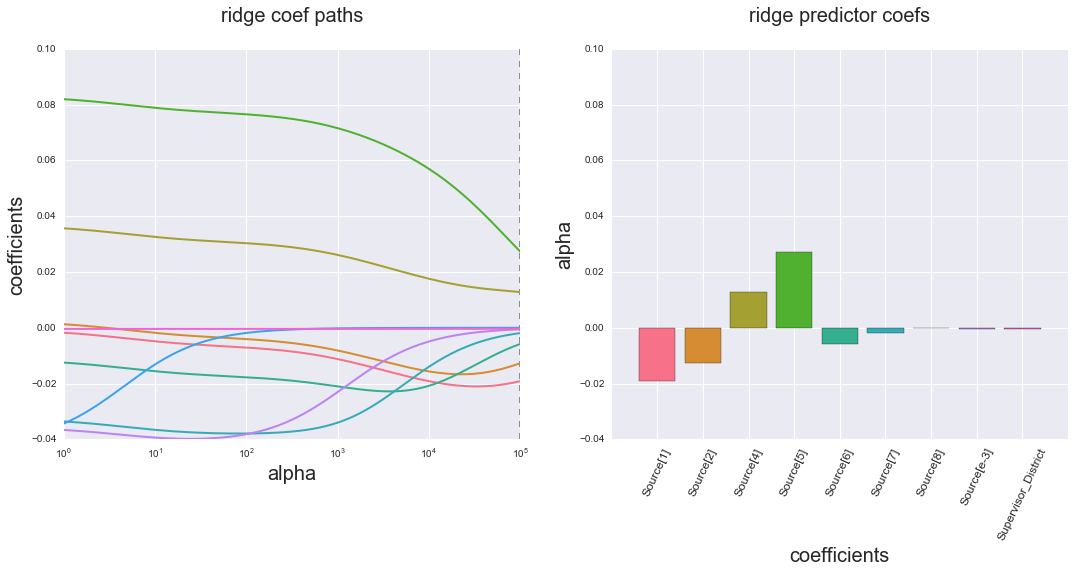

<function __main__.ridge_plot_runner>

In [172]:
def ridge_plot_runner(log_of_alpha=5):
    coef_plotter(r_alphas1, r_coefs1, simple_feature_names1, 10**log_of_alpha, regtype='ridge')

interact(ridge_plot_runner, log_of_alpha=(0.0,5.0,0.05))

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.2 Ploting GridSearch with Lasso, Ridge, or Elasticnet
---
1. Using the gridsearch results, plot your score in relation to your parameters.
1. Plot the effect on your coefficients given alpha.
1. Plot any other parameter change to visualize the impact of any other hyperparameter.

It's helpful to understand the impact of parameters used in Gridsearch, and that you are comfortable working with the data that is generated for reporting to explore the results visually.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Select San Francisco data of your choice and construct a regularized regression model (this can be data from an earlier analysis if you like). Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.

For example, when I worked in neuroscience [we created an effective penalized regression dubbed "GraphNet"](http://arxiv.org/abs/1110.4139) that combined the Lasso and Ridge penalties like in Elastic net with a third penalty that rewarded clustering of coefficients according to physical distance in FMRI brain activation data.

**Devise of and implement a penalized regression for San Francisco data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?